In [1]:
from keras.datasets import boston_housing
from keras import layers,models
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=boston_housing.load_data()

57344/57026 [==============================] - 0s 3us/step


In [4]:
x_train.shape

(404, 13)

In [6]:
y_train[0] # it look like a regression isn't it ?

15.2

In [8]:
x_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

## Normalizing the data 

In [10]:
mean=x_train.mean(axis=0)
x_train-=mean
std=x_train.std(axis=0)
x_train/=std

In [11]:
mean=x_test.mean(axis=0)
x_test-=mean
std=x_test.std(axis=0)
x_test/=std



In [12]:
def build_model():
    model=models.Sequential()
    model.add(layers.Dense(64,activation='relu',
                           input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

## validating with k-folds because of the small dataset

In [25]:
import numpy as np
k=4
num_val_samples=len(x_train)//k
num_epochs=100
all_mae_histories=[]
scores=[]


In [22]:

for i in range(k):
    print('k fold no '+str(i))
    x_val=x_train[i*num_val_samples:(i+1)*num_val_samples]
    y_val=y_train[i*num_val_samples:(i+1)*num_val_samples]
    partial_x_train=np.concatenate([
    x_train[:i*num_val_samples],x_train[(i+1)*num_val_samples:]],axis=0)
    
    partial_y_train=np.concatenate([
    y_train[:i*num_val_samples],y_train[(i+1)*num_val_samples:]],axis=0)
    model=build_model()
    model.fit(partial_x_train,partial_y_train,epochs=num_epochs,
              batch_size=1,verbose=0)#verbose=0 train the model without print 
    val_mse,val_mae=model.evaluate(x_val,y_val,verbose=0)
    scores.append(val_mae)

k fold no 0
k fold no 1
k fold no 2
k fold no 3


In [23]:
scores

[1.9430991470223606,
 2.3356197281639175,
 2.6407407935303038,
 2.3043038030662157,
 2.074310307455535,
 2.2795028450465438,
 2.5305877746921954,
 2.4238329759918815]

In [24]:
np.mean(scores)

2.316499671871119

### Train on 500 epochs now ! and keep track of the performance 

In [26]:
num_epochs=500
for i in range(k):
    print('k fold no '+str(i))
    x_val=x_train[i*num_val_samples:(i+1)*num_val_samples]
    y_val=y_train[i*num_val_samples:(i+1)*num_val_samples]
    partial_x_train=np.concatenate([
    x_train[:i*num_val_samples],x_train[(i+1)*num_val_samples:]],axis=0)
    
    partial_y_train=np.concatenate([
    y_train[:i*num_val_samples],y_train[(i+1)*num_val_samples:]],axis=0)
    model=build_model()
    hist=model.fit(partial_x_train,partial_y_train,validation_data=[x_val,y_val],epochs=num_epochs,
              batch_size=1,verbose=0)#verbose=0 train the model without print 
    all_mae_histories.append(hist.history['val_mean_absolute_error'])

k fold no 0
k fold no 1
k fold no 2
k fold no 3


In [28]:
avarage_mae_history=[
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]


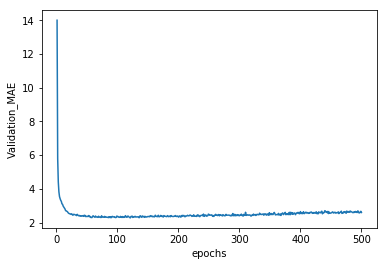

In [30]:
plt.plot(range(1,len(avarage_mae_history)+1),avarage_mae_history)
plt.xlabel('epochs')
plt.ylabel('Validation_MAE')
plt.show()

### smooth the curve to see better (remove the first epochs+ replace each point with a exponential moving average)

In [38]:
def smooth(points,factor=0.9):
    smoothed_points=[]
    for p in points:
        if(smoothed_points):
            prev=smoothed_points[-1]
            smoothed_points.append(prev*0.9+p*(1-factor))
        else:
            smoothed_points.append(p)
    return smoothed_points
            

In [39]:
smooth_mae_history = smooth(avarage_mae_history[10:])

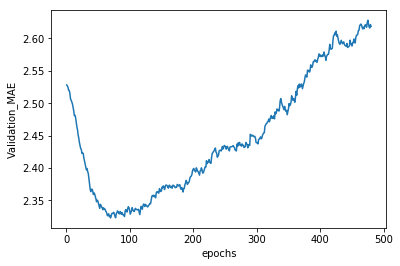

In [40]:
plt.plot(range(1,len(smooth_mae_history)+1),smooth_mae_history)
plt.xlabel('epochs')
plt.ylabel('Validation_MAE')
plt.show() ##  80 is so OK !

In [41]:
model =build_model()
model.fit(x_train,y_train,epochs=80,batch_size=16,verbose=0)
test_mse_score,test_mae=model.evaluate(x_test,y_test)

102/102 [==============================] - 0s 2ms/step


In [44]:
test_mae ## an avarage error of 2 million in the price is ok :D

2.7036883784275427